# The Sparks Foundation - Data Science & Business Analytics Internship

**Task 2 - Prediction Using Unsupervised Machine Learning**

*In this task it is required to predict the optimum number of cluster for the .iris data set consists of three types of flower namely iris-setosa, iris-versicolour and iris-virginica*

**Author - Manish Shishodia**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
import warnings as wg
wg.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Visualising the Data**

In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 6)

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
iris = pd.DataFrame(df)
iris_df = iris.drop(columns=["Id", "Species"])

In [12]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Find the optimum number of cluster**

*Before clustring the data using kmeans, we need to specify the number of clusters. In order to find the optimum number of clusters, there are various methods available, like Silhouette Cofficient and The Elbow Method. Here the elbow method is used*

**Brief about The Elbow Method**

*In this method, this number of clusters are varies within a certain range. For each number , within cluster sum of square(wss) value is calcualated and stored in a list. These values are then plotted against the range of number of clusters used before. The location of the bend in the 2D plot indicates the appropiate number of clusters.*

In [13]:
within_cluster_sum_of_square = []
cluster_range = range(1, 15)

for k in cluster_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)

In [14]:
within_cluster_sum_of_square

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 39.19708292889162,
 34.32042673992674,
 29.985923949641354,
 27.999767543859658,
 26.271551036682627,
 24.606982295482304,
 22.960282731157744,
 21.335414682539678,
 20.37272461456672]

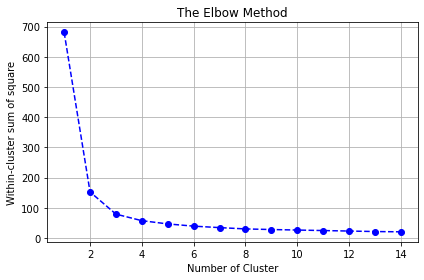

In [15]:
plt.plot(cluster_range, within_cluster_sum_of_square, "go--", color="b")
plt.xlabel("Number of Cluster")
plt.ylabel("Within-cluster sum of square")
plt.title("The Elbow Method")
plt.grid()

plt.tight_layout()

plt.show()

*We can see clearly why it is called The Elbow Method from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of square(WCSS) doesn't decrease significantly with every itration.*

*From this we choose the number of clusters as "3"*

**Applying KMeans Clustring On The Data**

In [16]:
model = KMeans(n_clusters=3)
predictions = model.fit_predict(iris_df)

In [17]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

**Visualise the Clusters**

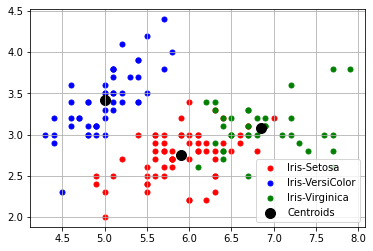

In [18]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s=25, color="r", label="Iris-Setosa")
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s=25, color="b", label="Iris-VersiColor")
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s=25, color="g", label="Iris-Virginica")

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color="k", s= 100, label= "Centroids")
plt.legend()
plt.grid()

plt.show()